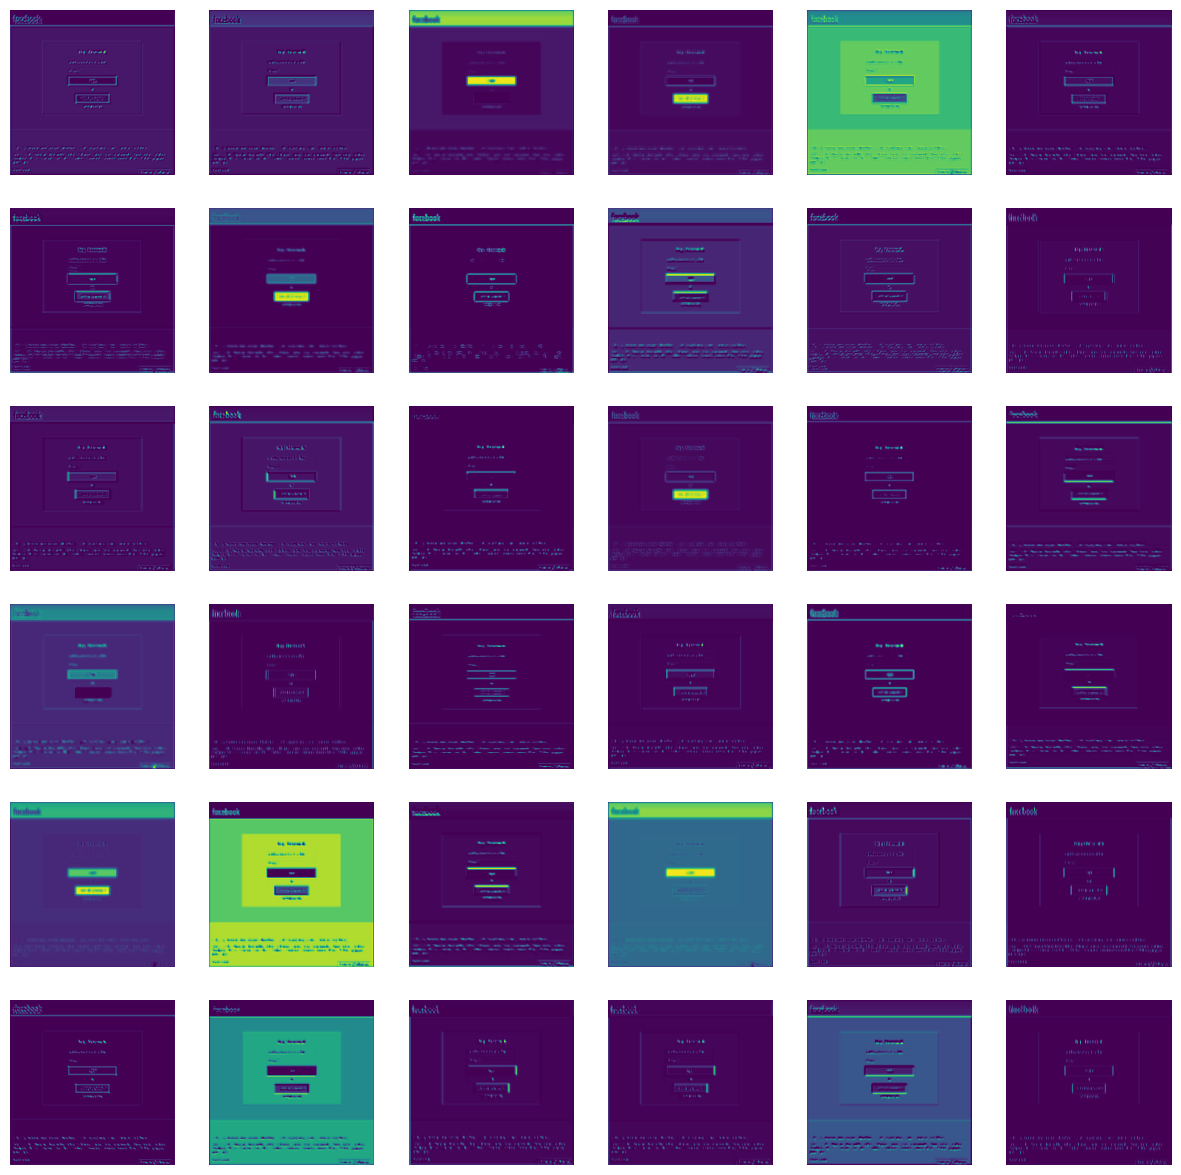

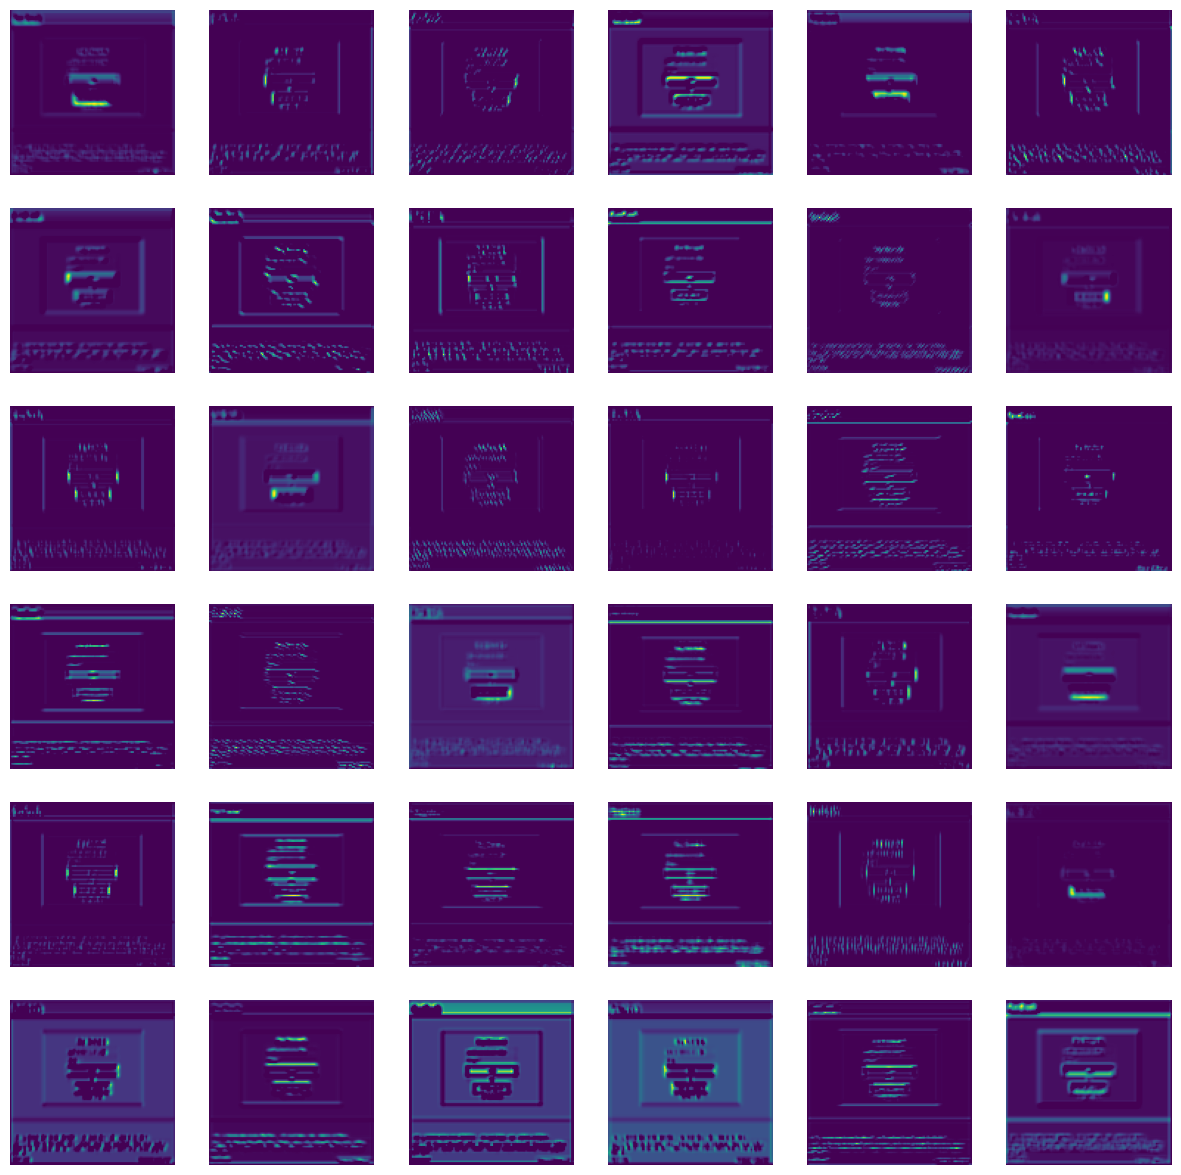

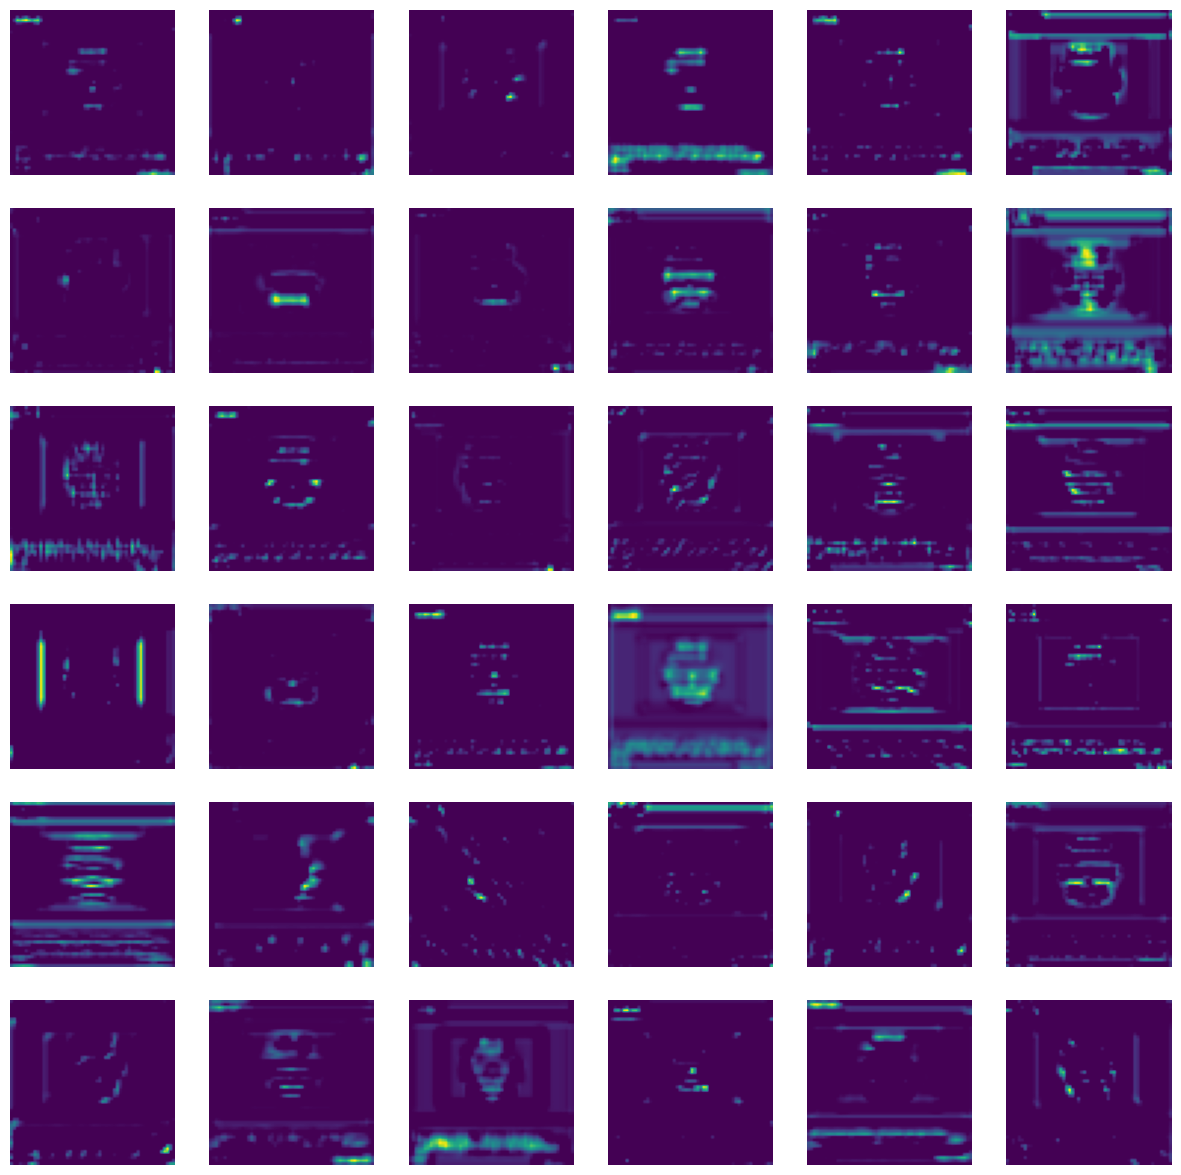

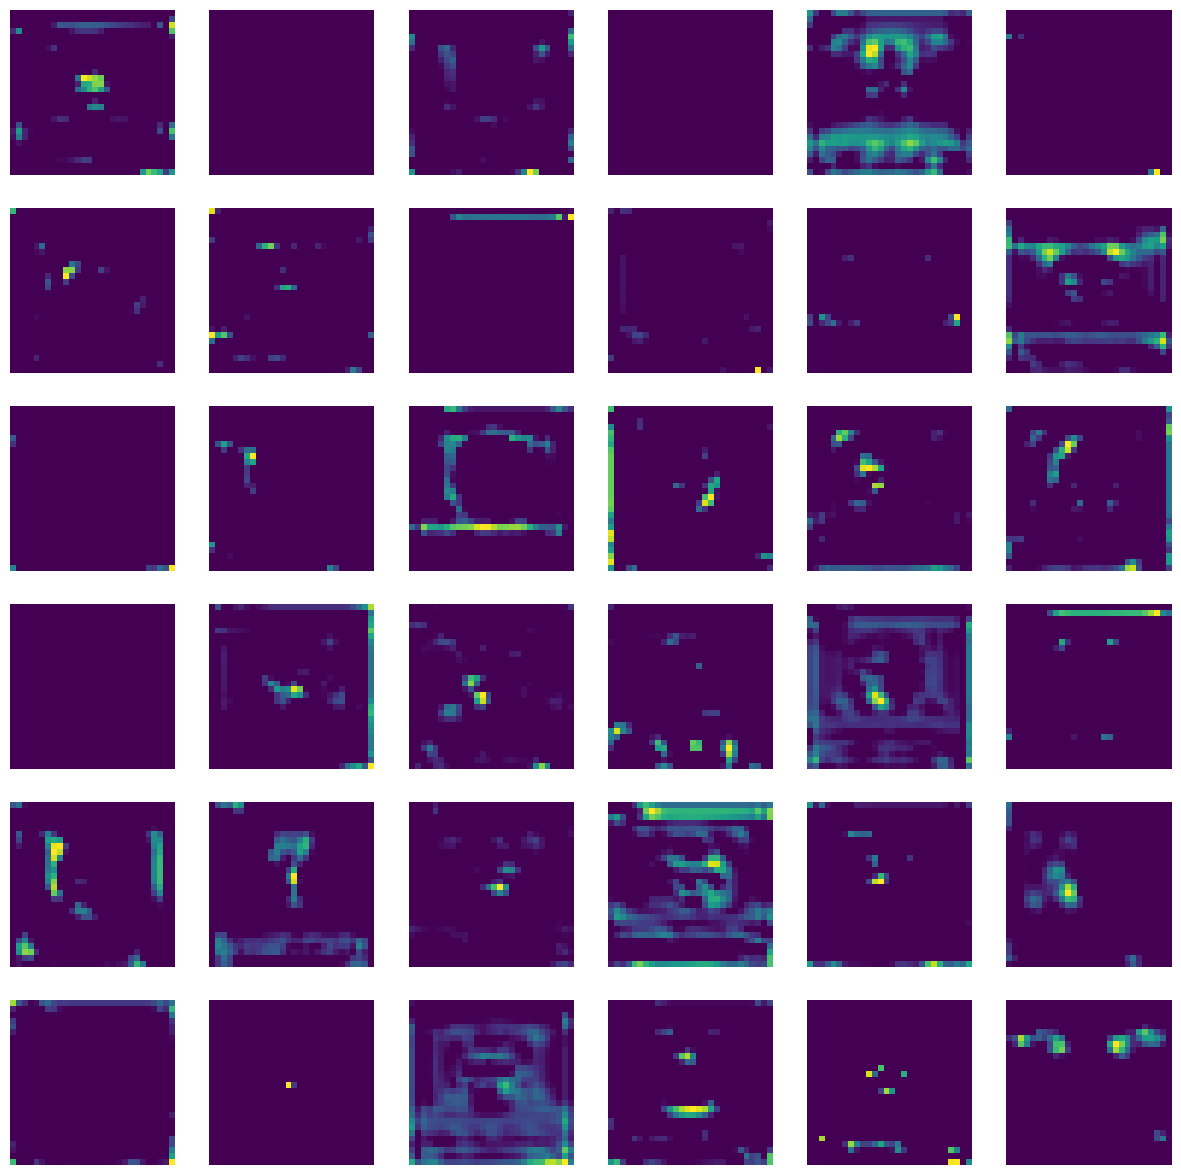

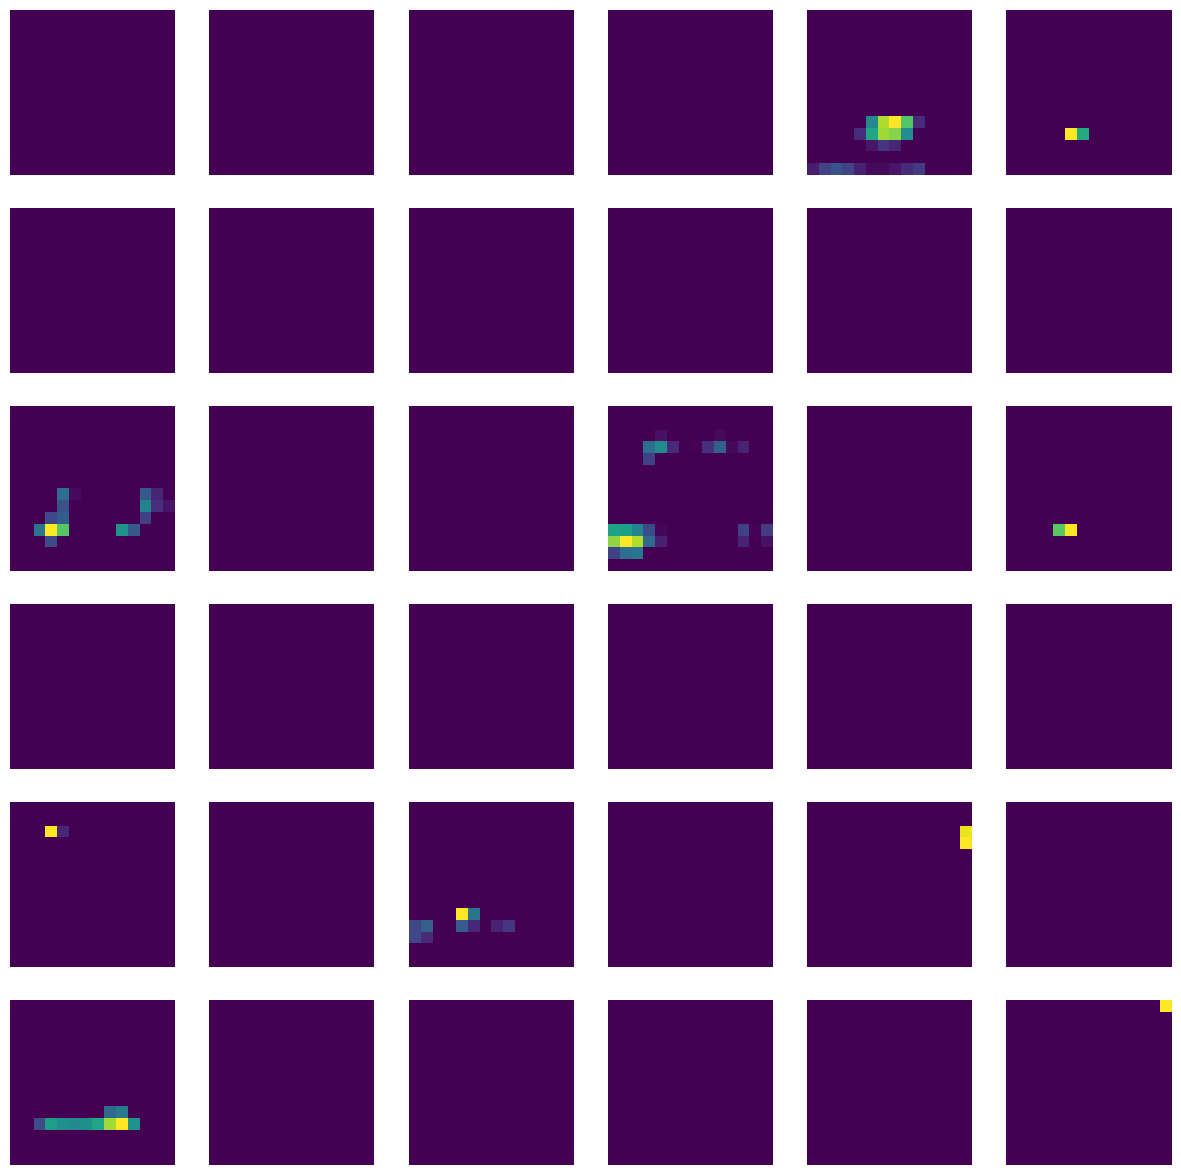

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

vgg16 = VGG16(weights='imagenet', include_top=False)

layers = [layer.output for layer in vgg16.layers if 'conv' in layer.name]

img_path = '/home/haohao/Desktop/Hieu/VisualPhish/phishing/facebook/T59_0.jpg'

intermediate_model = Model(inputs=vgg16.input, outputs=layers)

img = image.load_img(img_path, target_size=(224, 224))

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)
feature_maps = intermediate_model.predict(img_array, verbose=0)

pos = -1
for feature_map in feature_maps:
    pos += 1
    if pos == 1 or pos == 3 or pos == 6 or pos == 9 or pos == 12:
        plt.figure(figsize=(15, 15))
        for i in range(1, feature_map.shape[-1] + 1):
            if (i > 36):
                break
            plt.subplot(6, 6, i)  # Ajust the grid size based on your output
            plt.imshow(feature_map[0, :, :, i-1], cmap='viridis')
            plt.axis('off')
        plt.show()
    else:
        continue